In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use("pgf")
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

import matplotlib.patheffects as path_effects
from scipy.stats import gaussian_kde

typeface='Arial'
mpl.rcParams['font.weight']=200
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

def hpd(data, level):
    """
    Return highest posterior density interval from a list,
    given the percent posterior density interval required.
    """
    d = list(data)
    d.sort()

    nData = len(data)
    nIn = int(round(level * nData))
    if nIn < 2 :
        return None
    #raise RuntimeError("Not enough data. N data: %s"%(len(data)))

    i = 0
    r = d[i+nIn-1] - d[i]
    for k in range(len(d) - (nIn - 1)) :
        rk = d[k+nIn-1] - d[k]
        if rk < r :
            r = rk
            i = k

    assert 0 <= i <= i+nIn-1 < len(d)

    return (d[i], d[i+nIn-1])

def waiting_time(rate,length,prob):
    return np.log(prob)/(-rate*length)*365.0

def mean_waiting_time(rate,length):
    return 1.0/(rate*length)*365.0

def mutation_prob(rate,length,wait):
    return np.exp(-rate*wait/365.0*length)

In [2]:
viral_rates={}
genome_lengths={'genome':18997,'gp':2031}

for gene in ['genome','gp']:
    burnin=50000000
    if gene=='gp':
        paths=['/Users/evogytis/Downloads/genomic-horizon/run%d/Makona_600_%s.GLM.log'%(replicate,gene) for replicate in range(3,10)]
    elif gene=='genome':
        paths=['/Users/evogytis/Downloads/genomic-horizon/run%d/Makona_600_%s.GLM.log'%(replicate,gene) for replicate in range(0,3)]
        
    for path in paths:
        for line in open(path,'r'):
            l=line.strip('\n').split('\t')
            if '#' not in l and l[0]=='state':
                header={x:i for i,x in enumerate(l)}
                if gene not in viral_rates:
                    viral_rates[gene]={}
                    stat='meanRate'
                    viral_rates[gene][stat]=[]
            elif '#' not in l[0] and int(l[0])>burnin:
                viral_rates[gene][stat].append(float(l[header[stat]]))

other_rates={'Zika_genome':{'length':10274,'mean':1.12E-3,'HPDs':(0.97E-3,1.27E-3),'colour':'#CCC197','doi':'10.1038/nature22401'},
            'H1N1/09_HA':{'length':1701,'mean':3.67E-3,'HPDs':(3.41E-3, 3.92E-3),'colour':'#7F6E85','doi':'10.1038/nature08182'},
            'H1N1/09_genome':{'length':13154,'mean':3.406E-3,'HPDs':(3.15E-3, 3.67E-3),'colour':'#7F6E85','doi':'10.1098/rsbl.2013.0331'},
            'H3N2_HA':{'length':1701,'mean':5.72E-3,'HPDs':(5.17E-3,6.28E-3),'colour':'#7F6E85','doi':'10.1038/nature06945'},
            'MERS-CoV_genome':{'length':29364,'mean':1.12E-3,'HPDs':(8.76E-4,1.37E-3),'colour':'#E1C72F','doi':'10.1128/mBio.01062-13'},
            'Mumps_SH':{'length':316,'mean': 1.6E-3,'HPDs':(1.17E-3,2.21E-3),'colour':'#C482A9','doi':'10.1038/s41598-017-17474-z'},
            'RSV A_genome':{'length':15200,'mean':6.47E-4,'HPDs':(5.56E-4,7.38E-4),'colour':'#E09B51','doi':'10.1128/JVI.03278-12'},
            'Hepatitis C (1a)_genome':{'length':9286,'mean':1.44E-3,'HPDs':(1.00E-3,1.84E-3),'colour':'#48A365','doi':'10.1186/1471-2148-11-131'},
            'Mumps_genome':{'length':15384,'mean':8.60E-4,'HPDs':(5.06e-4,12.7e-4),'colour':'#C482A9','doi':'nextstrain.org'}
            }

In [3]:
## rate parameters
minRate=0.0001
maxRate=0.01

## sequence length parameters
minL=1
maxL=30000

## number of grid points to estimate probabilities/waiting times over
N=500

rates=np.linspace(minRate,maxRate,N)
lengths=np.linspace(minL,maxL,N)

# p=0.950
p=0.50

length_grid, rate_grid = np.meshgrid(lengths,rates)
# waiting_times = waiting_time(rate_grid,length_grid,p)
waiting_times = mean_waiting_time(rate_grid,length_grid)

print waiting_times

[[3.65000000e+06 5.97203095e+04 3.01064516e+04 ... 1.22156255e+02
  1.21910969e+02 1.21666667e+02]
 [3.04573579e+06 4.98335024e+04 2.51222731e+04 ... 1.01933062e+02
  1.01728384e+02 1.01524526e+02]
 [2.61312769e+06 4.27552862e+04 2.15539732e+04 ... 8.74547648e+01
  8.72791586e+01 8.71042563e+01]
 ...
 [3.66454066e+04 5.99582199e+02 3.02263879e+02 ... 1.22642894e+00
  1.22396631e+00 1.22151355e+00]
 [3.65725588e+04 5.98390282e+02 3.01663005e+02 ... 1.22399090e+00
  1.22153317e+00 1.21908529e+00]
 [3.65000000e+04 5.97203095e+02 3.01064516e+02 ... 1.22156255e+00
  1.21910969e+00 1.21666667e+00]]


genome 0.0009801089699842608 expected mean waiting time for mutation: 19.6035 days
gp 0.0015948946150738837 expected mean waiting time for mutation: 112.6811 days
RSV A_genome 0.000647 expected mean waiting time for mutation: 37.1146 days
Mumps_genome 0.00086 expected mean waiting time for mutation: 27.5883 days
H1N1/09_genome 0.003406 expected mean waiting time for mutation: 8.1469 days
Zika_genome 0.00112 expected mean waiting time for mutation: 31.7202 days
MERS-CoV_genome 0.00112 expected mean waiting time for mutation: 11.0984 days
H1N1/09_HA 0.00367 expected mean waiting time for mutation: 58.4686 days
Mumps_SH 0.0016 expected mean waiting time for mutation: 721.9146 days
H3N2_HA 0.00572 expected mean waiting time for mutation: 37.5139 days
Hepatitis C (1a)_genome 0.00144 expected mean waiting time for mutation: 27.2962 days


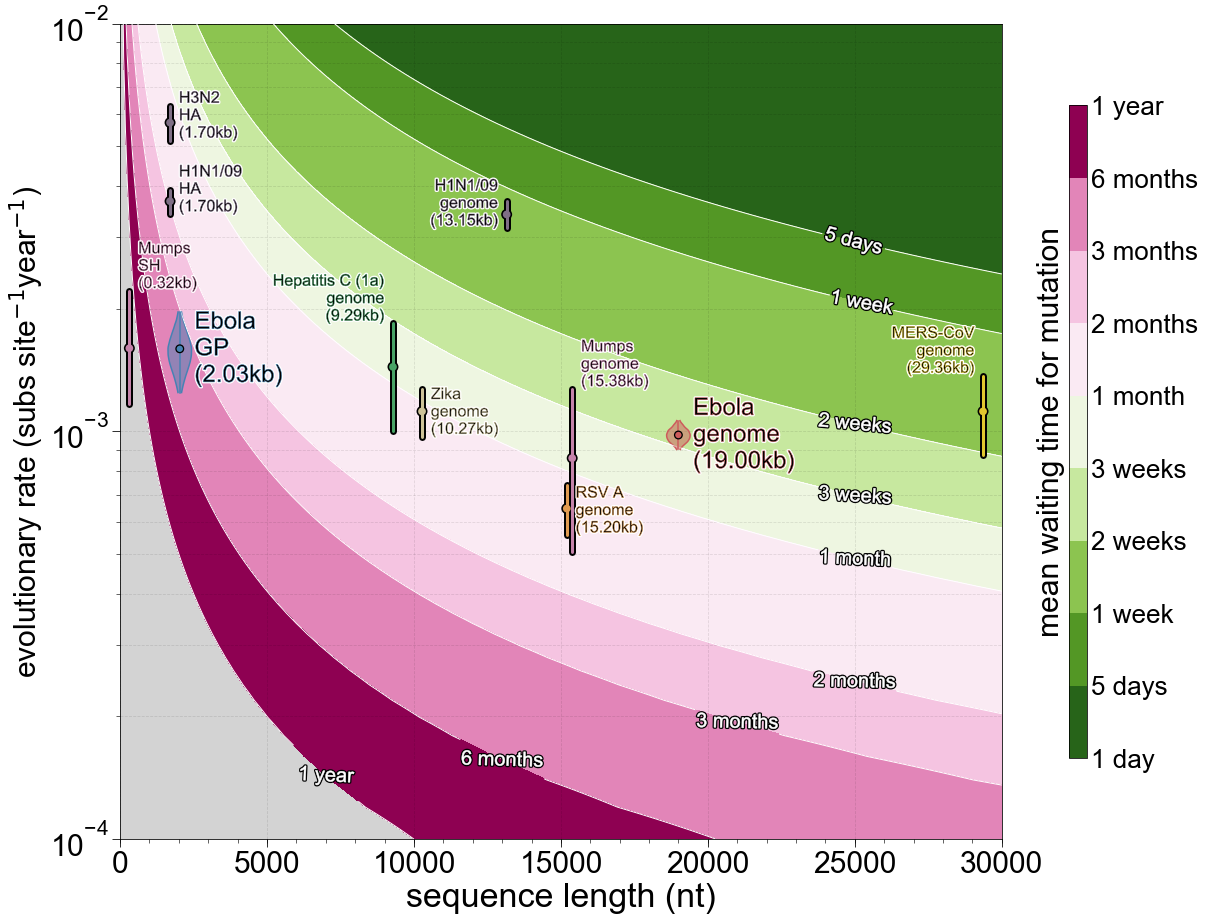

In [4]:
waiting_time_pos=[1,5,7,14,21,30,60,90,180,365]
waiting_labels=['1 day','5 days','1 week','2 weeks','3 weeks','1 month','2 months','3 months','6 months','1 year']

fig,ax = plt.subplots(figsize=(20, 15),facecolor='w')
ax.set_facecolor('lightgrey')

cmap=mpl.cm.get_cmap('PiYG_r',len(waiting_time_pos))
norm=mpl.colors.BoundaryNorm(waiting_time_pos,len(waiting_time_pos))

cf=ax.contourf(length_grid, rate_grid, waiting_times,levels=waiting_time_pos,cmap=cmap,norm=norm)
CS=ax.contour(length_grid, rate_grid, waiting_times,levels=waiting_time_pos,zorder=100,colors='w',linewidths=1)

fmt = {}
for l, s in zip(CS.levels, waiting_labels[1:]):
    fmt[l] = s
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=20,manual = [(7000,1e-4),(13000,1.1e-4),(21000,1.2e-4)]+[(25000,r) for r in [3e-4,4e-4,6e-4,1e-3,1.5e-3,3e-3]],zorder=100)

for item in CS.labelTextsList:
    effects=[path_effects.Stroke(linewidth=3, foreground='k'),
                 path_effects.Stroke(linewidth=0.5, foreground='w')] ## black text, white outline
    item.set_path_effects(effects)

cb = plt.colorbar(cf, aspect=35, shrink=0.8, pad=0.06, extend='both',norm=norm)
cb.ax.tick_params(size=0,labelsize=26)
#cb.set_label('waiting time until mutation probability $\leq$%.2f'%(p),size=30)
cb.set_label('mean waiting time for mutation',size=30)

cb.set_ticks(waiting_time_pos)
cb.set_ticklabels(waiting_labels)
cb.ax.yaxis.set_label_position('left')

ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")

ax.set_ylabel(r'evolutionary rate (subs site$^{-1}$year$^{-1}$)',size=30)
ax.set_xlabel(r'sequence length (nt)',size=34)

ax.tick_params(axis='y',which='major',size=8,direction='out',labelsize=30)
ax.tick_params(axis='y',which='minor',size=4,direction='out')
ax.tick_params(axis='x',which='major',size=8,direction='out',labelsize=30)
ax.tick_params(axis='x',which='minor',size=4,direction='out')

ax.legend(frameon=False,scatterpoints=1,ncol=2,markerscale=2,fontsize=16)

ax.grid(axis='y',which='both',ls='--',color='k',alpha=0.1)
ax.grid(axis='x',ls='--',color='k',alpha=0.1)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))
ax.set_yscale('log')

feasibleRateMax=5
feasibleLengthMax=30000
# ax.plot([minRate,feasibleRateMax],[feasibleLengthMax,feasibleLengthMax],lw=2,color='k')
# ax.plot([feasibleRateMax,feasibleRateMax],[minL,feasibleLengthMax],lw=2,color='k')

for gene in viral_rates:
    posterior_rate=viral_rates[gene]['meanRate']
    mean_posterior_rate=np.mean(posterior_rate)
    print gene,mean_posterior_rate,'expected mean waiting time for mutation: %.4f days'%(1/float(mean_posterior_rate*genome_lengths[gene])*365.0)
    
    kde=gaussian_kde(posterior_rate)
    y_grid=np.linspace(*hpd(posterior_rate,0.95),num=100)
    x_grid=kde.evaluate(y_grid)
    
    width=400
    
    if gene=='genome':
        fc='indianred'
    elif gene=='gp':
        fc='steelblue'
    
    effects=[path_effects.Stroke(linewidth=3, foreground='w'),
                 path_effects.Stroke(linewidth=0.5, foreground=fc)] ## black text, white outline
    ax.text(genome_lengths[gene]+500,mean_posterior_rate,'Ebola\n%s\n(%.2fkb)'%(gene.upper() if gene=='gp' else 'genome',genome_lengths[gene]/1000.0),va='center',ha='left',size=24,path_effects=effects,zorder=1000)
    
    
    x1_grid=genome_lengths[gene]+x_grid/x_grid.max()*width
    x2_grid=genome_lengths[gene]-x_grid/x_grid.max()*width
    ax.fill_betweenx(y_grid,x1_grid,x2_grid,zorder=900,facecolor=fc,alpha=0.5)
    ax.plot(x1_grid,y_grid,color=fc)
    ax.plot(x2_grid,y_grid,color=fc)
    
    ax.plot([genome_lengths[gene],genome_lengths[gene]],[min(y_grid),max(y_grid)],ls='-',color=fc,zorder=1000)
#     ax.plot([genome_lengths[gene],genome_lengths[gene]],[min(y_grid),max(y_grid)],ls='-',color='w',lw=3,zorder=999)
    s=40.0
    ax.scatter(genome_lengths[gene],mean_posterior_rate,s=s,zorder=1002,facecolor=fc,edgecolor='none')
    ax.scatter(genome_lengths[gene],mean_posterior_rate,s=s*2,zorder=1001,facecolor='k',edgecolor='none')

for virus in other_rates.keys():
    vir,gene=virus.split('_')
    mu=other_rates[virus]['mean']
    hpdLo,hpdHi=other_rates[virus]['HPDs']
    L=other_rates[virus]['length']
    
    print virus,mu,'expected mean waiting time for mutation: %.4f days'%(1/float(mu*L)*365.0)
    
    fc=other_rates[virus]['colour']
#     fc='w'
    s=60
    ax.scatter(L,mu,s=s,facecolor=fc,edgecolor='none',zorder=1000)
    ax.scatter(L,mu,s=s*2,facecolor='k',edgecolor='none',zorder=996)
    ax.plot([L,L],[hpdLo,hpdHi],color=fc,lw=3,zorder=998,solid_capstyle='round')
    ax.plot([L,L],[hpdLo,hpdHi],color='k',lw=7,zorder=997,solid_capstyle='round')
    
    effects=[path_effects.Stroke(linewidth=3, foreground='w'),
                 path_effects.Stroke(linewidth=0.5, foreground=fc)] ## black text, white outline
    ha='left'
    skip=300
    y=hpdLo
    va='bottom'
    if L>20000 or vir=='Hepatitis C (1a)' or virus=='H1N1/09_genome':
        skip=-300
        ha='right'
    if vir=='Mumps' or vir=='Hepatitis C (1a)' or vir=='MERS-CoV':
        va='bottom'
        y=hpdHi
    
    ax.text(L+skip,y,'%s\n%s\n(%.2fkb)'%(vir,gene,L/1000.0),va=va,ha=ha,size=16,path_effects=effects,zorder=10000)

plt.savefig('/Users/evogytis/Documents/genomic-horizon/figures/fig5_contours.png',dpi=300,bbox_inches='tight')
plt.show()

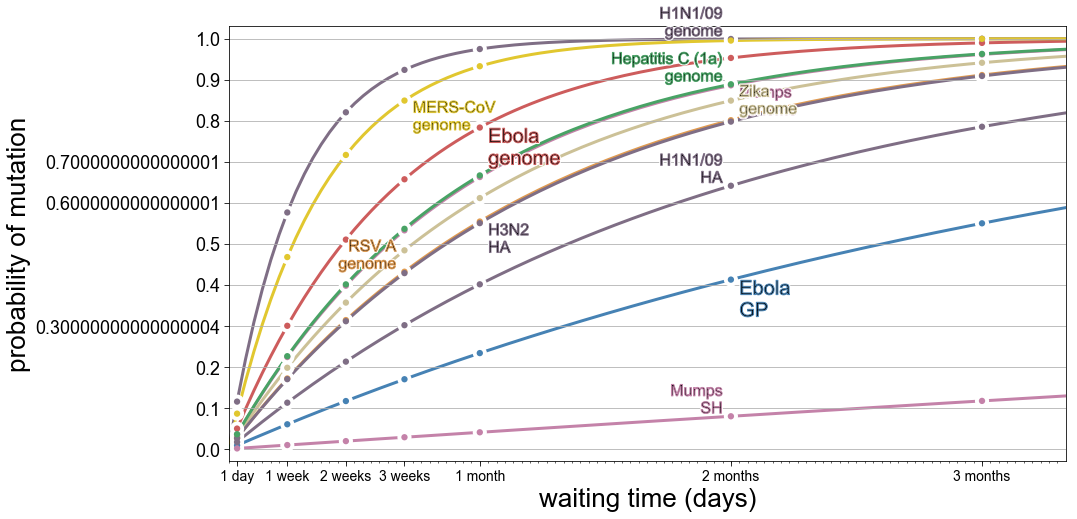

In [5]:
fig,ax = plt.subplots(figsize=(15, 8),facecolor='w')

effects=lambda col:[path_effects.Stroke(linewidth=3, foreground='w'),path_effects.Stroke(linewidth=1, foreground=col)]

for gene in viral_rates:
    posterior_rate=viral_rates[gene]['meanRate']
    mu=np.mean(posterior_rate)
    L=genome_lengths[gene]
    hpdLo,hpdHi=hpd(posterior_rate,0.95)
    
    if gene=='genome':
        aln=gene
        fc='indianred'
    elif gene=='gp':
        aln=gene.upper()
        fc='steelblue'
    
    xs=np.linspace(0,200,200)
    ys=[1-mutation_prob(mu,L,t) for t in xs]
    
    ax.plot(xs,ys,color=fc,lw=3,zorder=0,ls='-')  
    
    xs=[x for x in waiting_time_pos if x!=5]
    ys=[1-mutation_prob(mu,L,t) for t in xs]
    ax.scatter(xs,ys,s=40,facecolor=fc,edgecolor='none',zorder=100)
    ax.scatter(xs,ys,s=200,facecolor='w',edgecolor='none',zorder=99)
    
    ha='left'
    skip=1
    va='top'
    idx=4
    if gene=='gp':
        idx=5
    ax.text(xs[idx]+skip,ys[idx],'Ebola\n%s'%(aln),va=va,ha=ha,size=20,path_effects=effects(fc),zorder=10000)

for virus in other_rates.keys():
    vir,gene=virus.split('_')
    mu=other_rates[virus]['mean']
    hpdLo,hpdHi=other_rates[virus]['HPDs']
    L=other_rates[virus]['length']
    fc=other_rates[virus]['colour']
    xs=np.linspace(0,200,200)
    ys=[1-mutation_prob(mu,L,t) for t in xs]
    
    ax.plot(xs,ys,color=fc,lw=3,zorder=0,ls='-')
    
    xs=[x for x in waiting_time_pos if x!=5]
    ys=[1-mutation_prob(mu,L,t) for t in xs]
    ax.scatter(xs,ys,s=40,facecolor=fc,edgecolor='none',zorder=100)
    ax.scatter(xs,ys,s=200,facecolor='w',edgecolor='none',zorder=99)
    
    ha='left'
    skip=1
    y=hpdLo
    va='top'
    idx=4
    
    if '/09' in vir:
        idx=5
        va='bottom'
        ha='right'
        skip=-1
    
    if vir=='Mumps' or vir=='Hepatitis C (1a)' or vir=='RSV A':
        ha='right'
        va='bottom'
        idx=5
        
        if vir=='RSV A':
            idx=3
            
        skip=-1
        if vir=='Mumps' and gene=='genome':
            va='top'
            ha='left'
            skip=1
    if vir=='Zika':
        idx=5
        if vir=='Zika':
            va='center'
    if vir=='MERS-CoV':
        idx=3
        
    ax.text(xs[idx]+skip,ys[idx],'%s\n%s'%(vir,gene),va=va,ha=ha,size=16,path_effects=effects(fc),zorder=10000)
    
ax.grid(axis='y')

ax.set_ylabel('probability of mutation',size=26)
ax.set_xlabel('waiting time (days)',size=26)
ax.tick_params(axis='y',size=5,labelsize=18)
ax.tick_params(axis='x',size=5,labelsize=14)

ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels(ax.get_yticks())

ax.set_xticks(range(100),minor=True)
ax.set_xticks([x for x in waiting_time_pos if x!=5])
ax.set_xticklabels([x for x in waiting_labels if '5' not in x])
ax.set_xlim(0,100)
ax.set_ylim(-0.03,1.03)

# plt.savefig('/Users/evogytis/Documents/genomic-horizon/figures/fig6_probabilities.png',dpi=300,bbox_inches='tight')
plt.show()

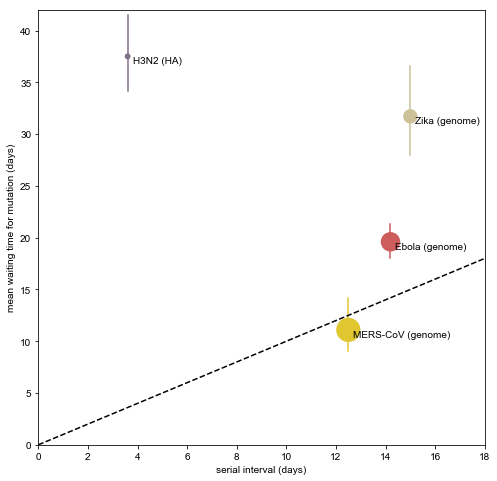

In [6]:
fig,ax = plt.subplots(figsize=(8, 8),facecolor='w')

posterior_rate=viral_rates['genome']['meanRate']
mu=np.mean(posterior_rate)
L=genome_lengths['genome']
hpdLo,hpdHi=hpd(posterior_rate,0.95)
ax.scatter(14.2,1/(mu*L)*365.0,s=L/50.0,facecolor='indianred',edgecolor='none')
ax.plot([14.2,14.2],[1/(hpdLo*L)*365.0,1/(hpdHi*L)*365.0],color='indianred')
ax.text(14.2+0.2,1/(mu*L)*365.0,'Ebola (genome)',ha='left',va='top')
    
serials={'Zika_genome':15.0,'MERS-CoV_genome':12.5,'H3N2_HA':3.6}

for virus in serials:
    vir,gene=virus.split('_')
    mu=other_rates[virus]['mean']
    hpdLo,hpdHi=other_rates[virus]['HPDs']
    L=other_rates[virus]['length']
    fc=other_rates[virus]['colour']
    #xs=np.linspace(0,200,200)
    #ys=[1-mutation_prob(mu,L,t) for t in xs]
    ax.scatter(serials[virus],1/(mu*L)*365.0,s=L/50.0,facecolor=fc,edgecolor='none')
    ax.plot([serials[virus],serials[virus]],[1/(hpdLo*L)*365.0,1/(hpdHi*L)*365.0],color=fc)
    ax.text(serials[virus]+0.2,1/(mu*L)*365.0,'%s (%s)'%(vir,gene),ha='left',va='top')
#     ax.plot(xs,ys,color=fc,lw=3,zorder=0,ls='-')

ax.plot(range(100),range(100),ls='--',color='k')
# ax.plot(range(100),range(0,200,2),ls='--',color='grey')
# ax.plot(range(100),range(0,300,3),ls='--',color='lightgrey')
ax.set_xlabel('serial interval (days)')
ax.set_ylabel('mean waiting time for mutation (days)')
ax.set_ylim(0,42)
ax.set_xlim(0,18)

plt.show()